**MSA 8010: DATA PROGRAMMING FOR ANALYTICS**

Project2



Team Members
1. Avantika Balaji (Team Leader)
2. Nana Amoah
3. Palak Kakani
4. Rakshitha Narasimhaiah
5. Shreya Vyas



In this project, our team aimed to develop an optimized pricing model for Airbnb listings by conducting thorough data exploration and pre-processing. We handled missing data, encoded categorical variables, scaled numerical features, and identified and managed outliers. After pre-processing, we developed several machine learning models to predict optimal pricing for Airbnb listings. The goal is to create a scalable, data-driven solution that accurately forecasts competitive prices, helping Airbnb hosts maximize revenue while adapting to market trends.


**DESCRIPTIVE STATISTICS OF THE DATASET**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

df = pd.read_csv('AB_NYC_2019.csv')
import pandas as pd

# 1. Number of Data Points (rows) and Descriptive Features (columns)
num_data_points = df.shape[0]  # Number of rows
num_features = df.shape[1]  # Number of columns

# 2. Type of Features
feature_types = df.dtypes  # Show data type of each feature

# 3. Target Feature and Its Type
target_feature = 'price'
target_feature_type = df[target_feature].dtype  # Data type of target feature

# 4. Descriptive Statistics for Different Target Feature Values
descriptive_stats_by_target = df.groupby(target_feature).describe()

# 5. Descriptive Statistics of the Entire Dataset (for numerical features)
overall_descriptive_stats = df.describe()

# Display Results
print(f"Number of Data Points: {num_data_points}")
print(f"Number of Descriptive Features: {num_features}")
print("\nFeature Types:")
print(feature_types)
print(f"\nTarget Feature: {target_feature}, Type: {target_feature_type}")
print("\nDescriptive Statistics for Different Target Feature Values:")
print(descriptive_stats_by_target)
print("\nOverall Descriptive Statistics (for numerical features):")
print(overall_descriptive_stats)

Number of Data Points: 48895
Number of Descriptive Features: 16

Feature Types:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Target Feature: price, Type: int64

Descriptive Statistics for Different Target Feature Values:
         id                                                                   \
      count          mean           std         min      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**EXPLORATORY DATA ANALYSIS**

**MISSING DATA ANALYSIS**

In [ ]:
# Checking for missing values in each feature
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]  # Filtering out features without missing data

print("Features with missing data:")
print(missing_data)

Features with missing data:
name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


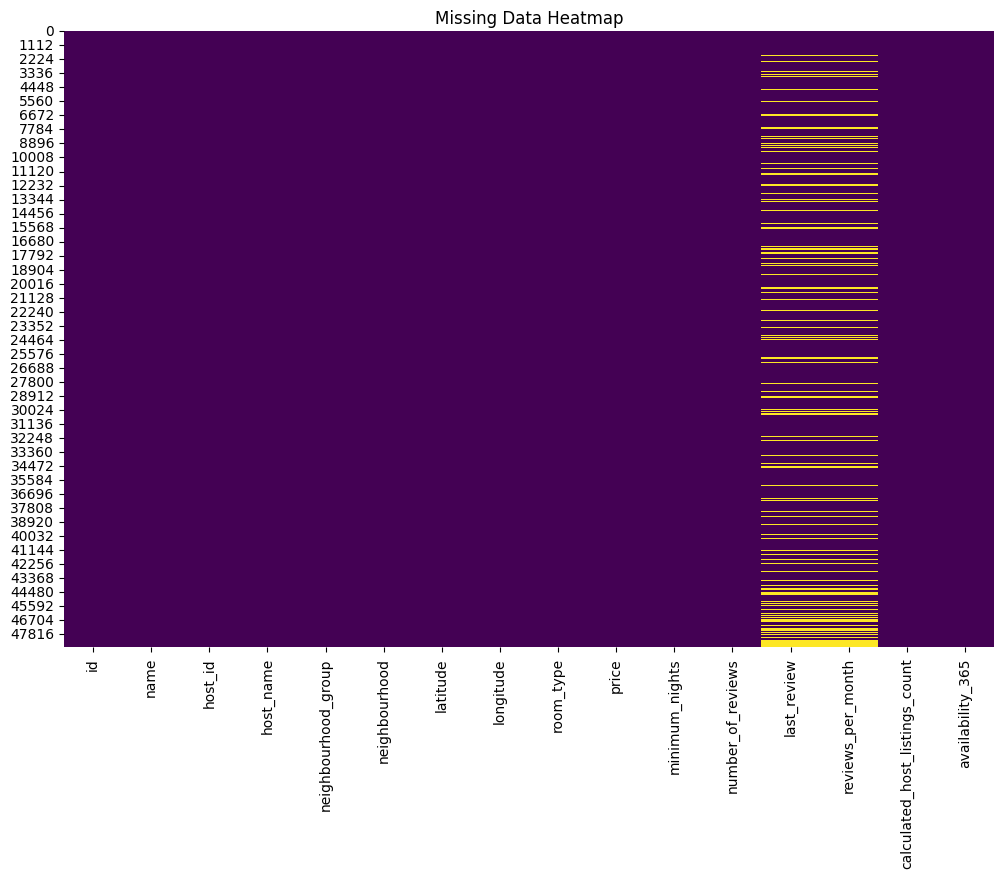

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Missing Data Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

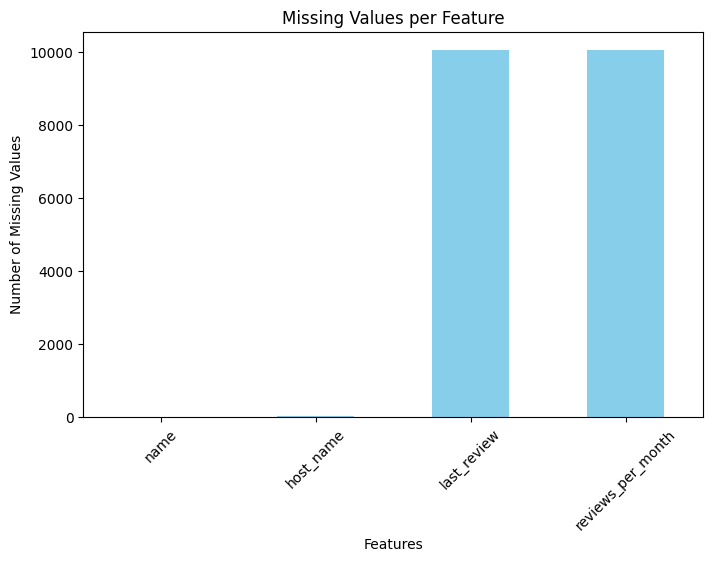

In [ ]:
# Visualizing missing values with a bar chart
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

plt.figure(figsize=(8, 5))
missing_data.plot(kind='bar', color='skyblue')
plt.title("Missing Values per Feature")
plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.show()

In [17]:
# We dropped the variables that we will not use from the data set.
drop_list = ['id', 'host_id', 'host_name', "last_review"]

In [18]:
df.drop(drop_list, axis=1, inplace=True)

In [19]:
df.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


**HANDLING MISSING DATA**

In [20]:
# Importing necessary modules for data imputation and scaling
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

# Extracting the 'reviews_per_month' column from the dataset for processing
dff = df[["reviews_per_month"]]

# Using RobustScaler to normalize the 'reviews_per_month' column
rs = RobustScaler()
dff = pd.DataFrame(rs.fit_transform(dff), columns=dff.columns)

# Applying KNNImputer to handle missing values in the scaled 'reviews_per_month' column
dff = pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(dff), columns=dff.columns)

In [21]:
# Reverting the scaling applied earlier to the 'reviews_per_month' column
dff = pd.DataFrame(rs.inverse_transform(dff), columns=dff.columns)

# Updating the original DataFrame with the imputed and inverse-transformed 'reviews_per_month' column
df[["reviews_per_month"]] = dff

In [22]:
df.head(10)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0
5,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.590000,1,129
6,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.400000,1,0
7,Large Furnished Room Near B'way,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.470000,1,220
8,Cozy Clean Guest Room - Family Apt,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.990000,1,0
9,Cute & Cozy Lower East Side 1 bdrm,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.330000,4,188


**VISUALIZATIONS**

<ipython-input-80-dd2e34f16e1f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='neighbourhood_group', data=df, palette='Spectral')


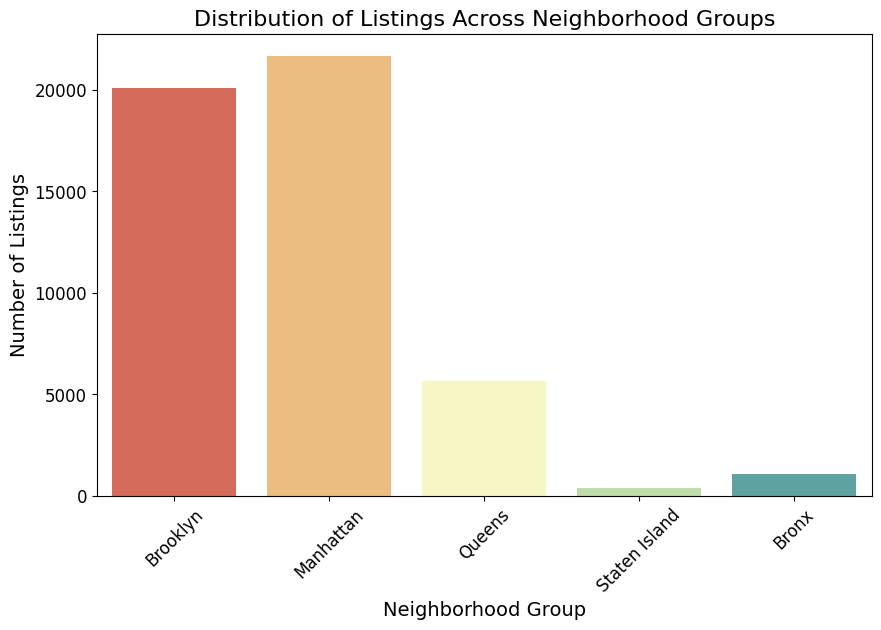

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of listings per neighborhood group
plt.figure(figsize=(10,6))

# Use a different color palette (e.g., 'coolwarm') and update labels
sns.countplot(x='neighbourhood_group', data=df, palette='Spectral')

# Add title and axis labels with more descriptive text
plt.title('Distribution of Listings Across Neighborhood Groups', fontsize=16)
plt.xlabel('Neighborhood Group', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


,count
neighbourhood,
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971


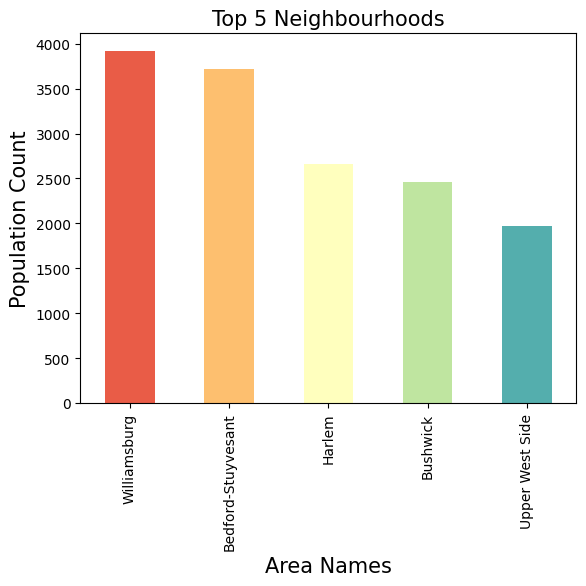

In [ ]:
# Extract the top 5 neighbourhoods with the highest counts
Top_10_neighbourhoods = df['neighbourhood'].value_counts().head(5)

# Display the top 5 neighbourhoods and their respective counts for verification
display(Top_10_neighbourhoods)
colors = sns.color_palette('Spectral', len(Top_10_neighbourhoods))

# Create a bar chart to visualize the top 5 neighbourhoods and their population counts
Top_10_neighbourhoods.plot(kind='bar', color=colors)

plt.title("Top 5 Neighbourhoods", size=15)
plt.xlabel("Area Names", size=15)
plt.ylabel("Population Count", size=15)
plt.xticks(rotation=90)

# Display the final plot
plt.show()

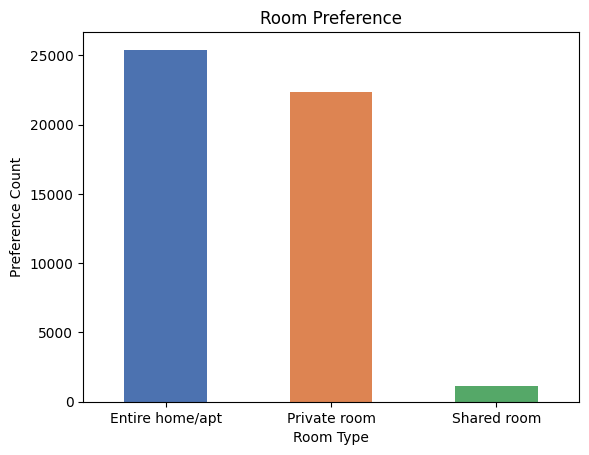

In [ ]:
# Count the occurrences of each unique value in the 'room_type' column
room_types = df['room_type'].value_counts()
colors = sns.color_palette('deep', len(room_types))

# Create a bar chart to visualize the counts of each room type
# The bar heights represent the number of preferences for each room type
room_types.plot(kind='bar', color=colors)

plt.title("Room Preference")
plt.xlabel("Room Type")
plt.ylabel("Preference Count")
plt.xticks(rotation=0)

# Display the final chart
plt.show()

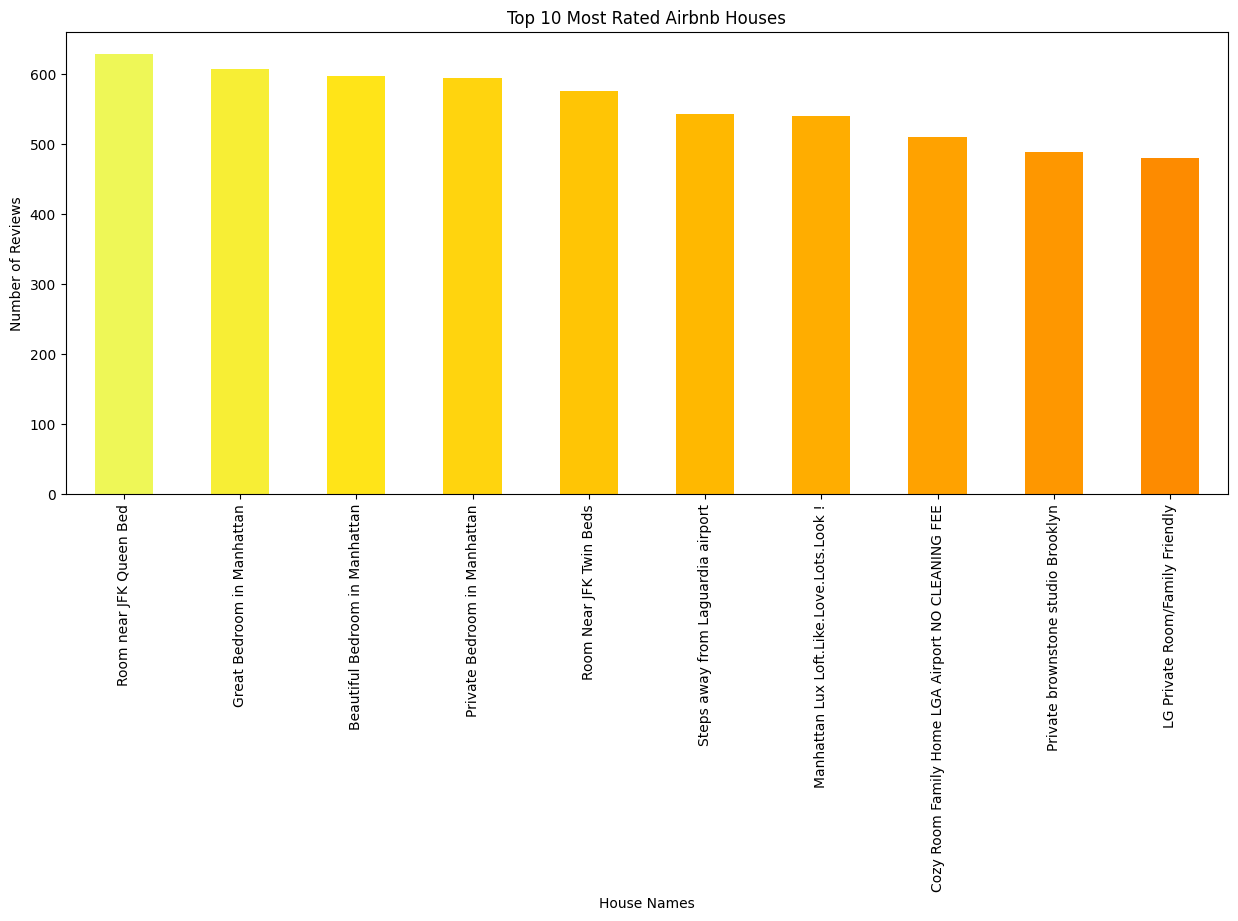

In [ ]:
# Select the 'name' and 'number_of_reviews' columns from the DataFrame
Top10_rated_airbnb = df[['name', 'number_of_reviews']].sort_values(by='number_of_reviews', ascending=False).head(10)

plt.figure(figsize=(15, 6))
colors = sns.color_palette('Wistia', len(Top10_rated_airbnb))

# Create a bar chart to visualize the number of reviews for the top 10 most-rated Airbnb houses
Top10_rated_airbnb['number_of_reviews'].plot(kind='bar', color=colors)
plt.xticks(ticks=range(len(Top10_rated_airbnb)), labels=Top10_rated_airbnb['name'], rotation=90)
plt.title('Top 10 Most Rated Airbnb Houses')
plt.xlabel('House Names')
plt.ylabel('Number of Reviews')

# Display the final bar chart
plt.show()

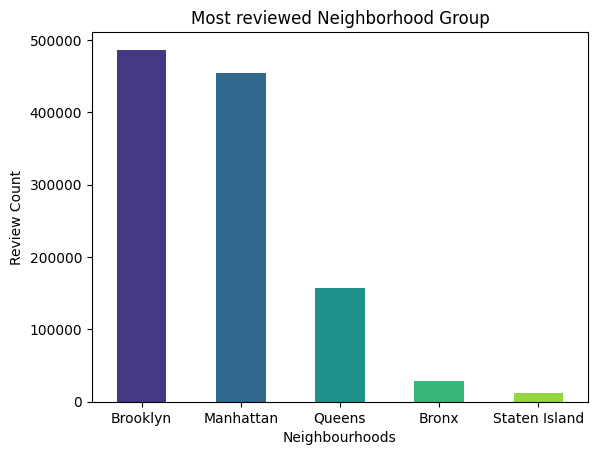

In [ ]:
# Group the DataFrame by 'neighbourhood_group' and calculate the total number of reviews for each group
grouped_reviews = df.groupby('neighbourhood_group')['number_of_reviews'].sum()

# Sort the grouped data in descending order to highlight the most reviewed neighbourhood groups
grouped_reviews.sort_values(ascending=False, inplace=True)

grouped_reviews
colors = sns.color_palette('viridis', len(grouped_reviews))

# Create a bar chart to visualize the total number of reviews for each neighbourhood group
grouped_reviews.plot(kind='bar', color=colors)

plt.title('Most Reviewed Neighborhood Group')
plt.xlabel("Neighbourhoods")
plt.ylabel("Review Count")
plt.xticks(rotation=0)

# Display the final bar chart
plt.show()

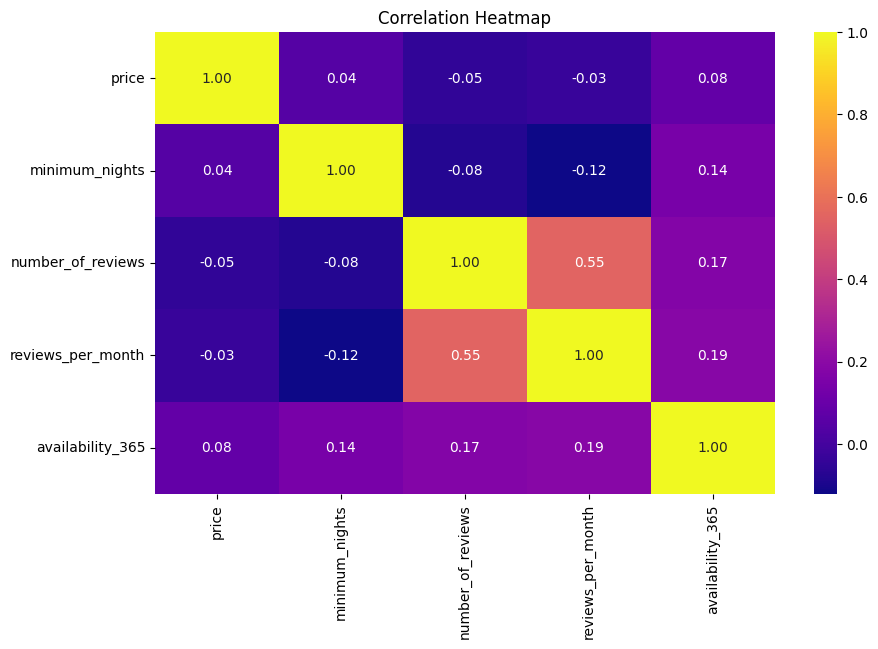

In [ ]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr(), annot=True, cmap='plasma', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

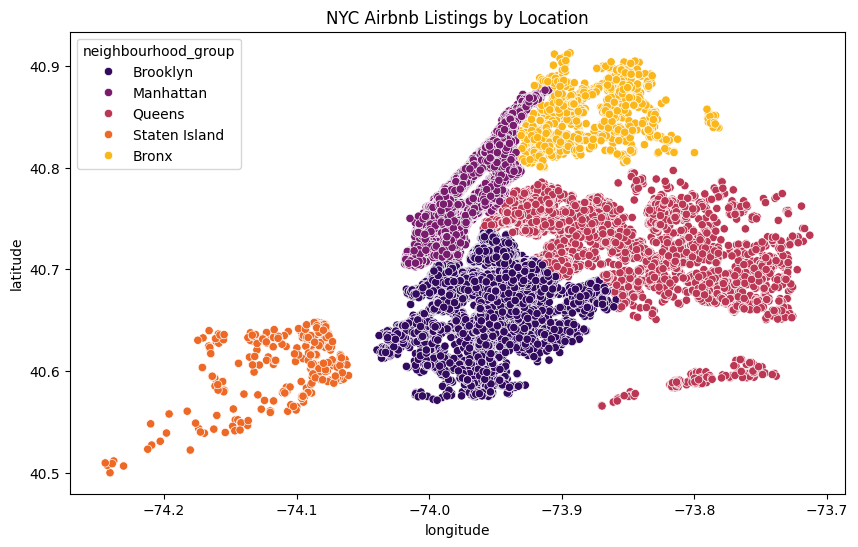

In [ ]:
# Scatter plot to visualize Airbnb listing locations
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', palette='inferno', data=df)
plt.title('NYC Airbnb Listings by Location')
plt.show()

**CALCULATING Z-SCORES**

In [ ]:
from scipy import stats

# Create a new DataFrame 'df_z' with specific columns to store z-scores and original values for price and reviews
df_z = pd.DataFrame(columns=['price_z_score', 'reviews_z_score', 'price', 'reviews_count'])

# Calculate the z-scores (standard scores) for the 'price' column in the original DataFrame 'df'
df_z['price_z_score'] = stats.zscore(df['price'])

# Calculate the z-scores for the 'number_of_reviews' column in the original DataFrame 'df'
df_z['reviews_z_score'] = stats.zscore(df['number_of_reviews'])

# Add the original 'price' column values from the original DataFrame 'df' to the new DataFrame 'df_z'
df_z['price'] = df['price']

# Add the original 'number_of_reviews' column values to the new DataFrame 'df_z' as 'reviews_count'
df_z['reviews_count'] = df['number_of_reviews']

# Display the first few rows of the 'df_z' DataFrame to verify the z-score calculations and added data
df_z.head()

,price_z_score,reviews_z_score,price,reviews_count
0,-0.015493,-0.320414,149,9
1,0.300974,0.487665,225,45
2,-0.011329,-0.522433,150,0
3,-0.265335,5.538156,89,270
4,-0.302811,-0.320414,80,9


In [ ]:
# Identify the outliers based on z-scores for the 'price' column (outliers with z-scores > 3 or < -3)
outliers_z_price = df_z[(df_z['price_z_score'] > 3) | (df_z['price_z_score'] < -3)]

# Identify the outliers based on z-scores for the 'number_of_reviews' column (outliers with z-scores > 3 or < -3)
outliers_z_reviews = df_z[(df_z['reviews_z_score'] > 3) | (df_z['reviews_z_score'] < -3)]

# Sort the identified outliers for price by their z-scores in descending order (from high to low)
sorted_outliers_z_price = outliers_z_price.sort_values(by='price_z_score', ascending=False)

# Print the top 3 outliers (with highest price z-scores)
print("Top 3 outliers for price \n", sorted_outliers_z_price.head(3))

# Print the bottom 3 outliers (with lowest price z-scores)
print("Bottom 3 outliers for price \n", sorted_outliers_z_price.tail(3))

Top 3 outliers for price 
        price_z_score  reviews_z_score  price  reviews_count
29238       41.00441        -0.522433  10000              0
9151        41.00441        -0.477540  10000              2
17692       41.00441        -0.410200  10000              5
Bottom 3 outliers for price 
        price_z_score  reviews_z_score  price  reviews_count
2040        3.070056         0.061179    890             26
8805        3.061728         0.420325    888             42
44476       3.007596        -0.522433    875              0


In [ ]:
# Sort the identified outliers for reviews by their z-scores in descending order (from high to low)
sorted_outliers_z_reviews = outliers_z_reviews.sort_values(by='reviews_z_score', ascending=False)

# Print the top 3 outliers (with highest reviews z-scores)
print("Top 3 outliers for reviews \n", sorted_outliers_z_reviews.head(3))

# Print the bottom 3 outliers (with lowest reviews z-scores)
print("Bottom 3 outliers for reviews \n", sorted_outliers_z_reviews.tail(3))

Top 3 outliers for reviews 
        price_z_score  reviews_z_score  price  reviews_count
11759      -0.440225        13.596494     47            629
2031       -0.431897        13.102668     49            607
2030       -0.431897        12.878202     49            597
Bottom 3 outliers for reviews 
        price_z_score  reviews_z_score  price  reviews_count
3974        0.092772         3.001687    175            157
7688       -0.365272         3.001687     65            157
17571      -0.452717         3.001687     44            157


The outliers for both price and reviews appear to be concentrated on the right side, as the minimum Z-score for both variables is greater than +3.

**IDENTIFYING OUTLIERS**

In [ ]:
# Calculate the first and third quartiles (Q1 and Q3) for price and number of reviews
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price  # Interquartile Range for price

Q1_reviews = df['number_of_reviews'].quantile(0.25)
Q3_reviews = df['number_of_reviews'].quantile(0.75)
IQR_reviews = Q3_reviews - Q1_reviews  # Interquartile Range for number of reviews

# Identify the outliers for price based on the IQR method
outliers_iqr_price = df[(df['price'] < (Q1_price - 1.5 * IQR_price)) |
                        (df['price'] > (Q3_price + 1.5 * IQR_price))]

# Identify the outliers for number of reviews based on the IQR method
outliers_iqr_reviews = df[(df['number_of_reviews'] < (Q1_reviews - 1.5 * IQR_reviews)) |
                          (df['number_of_reviews'] > (Q3_reviews + 1.5 * IQR_reviews))]

# Display the outliers for price and number of reviews
print("Outliers in 'Price' based on IQR:\n", outliers_iqr_price[['price']].sort_values(by='price', ascending=False))
print("Outliers in 'Number of Reviews' based on IQR:\n", outliers_iqr_reviews[['number_of_reviews']].sort_values(by='number_of_reviews', ascending=False))


Outliers in 'Price' based on IQR:
        price
9151   10000
17692  10000
29238  10000
6530    9999
12342   9999
...      ...
44761    335
10398    335
30330    335
19462    335
35414    335

[2972 rows x 1 columns]
Outliers in 'Number of Reviews' based on IQR:
        number_of_reviews
11759                629
2031                 607
2030                 597
2015                 594
13495                576
...                  ...
32093                 59
26239                 59
22745                 59
7269                  59
670                   59

[6021 rows x 1 columns]


Number of price outliers: 388
Number of number_of_reviews outliers: 1221
Number of minimum_nights outliers: 327
Number of calculated_host_listings_count outliers: 680
Number of availability_365 outliers: 0


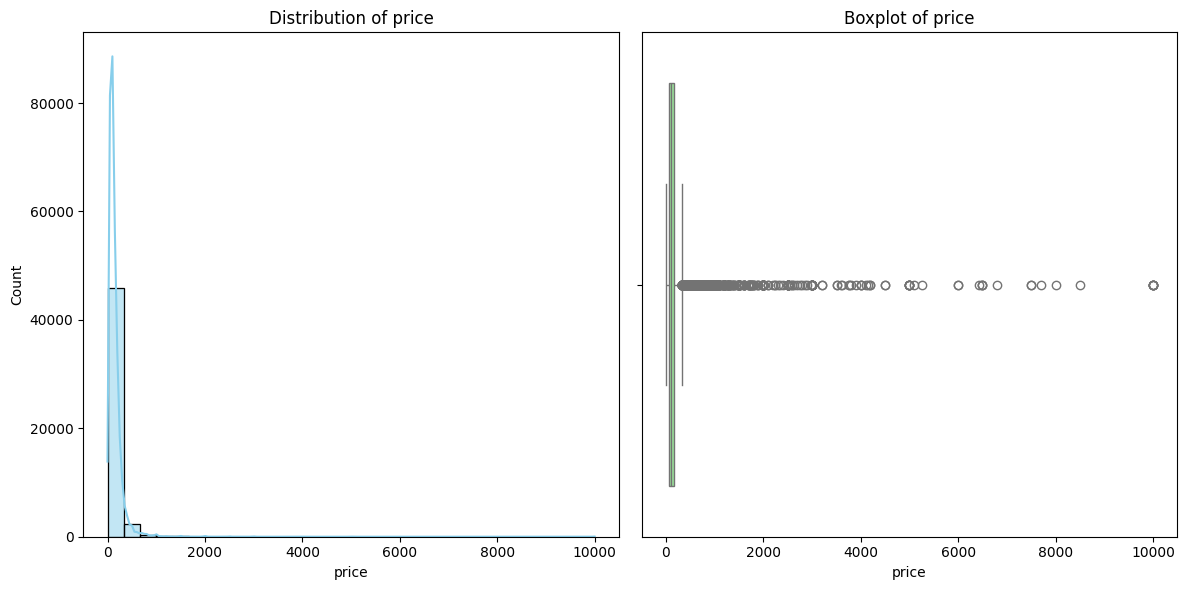

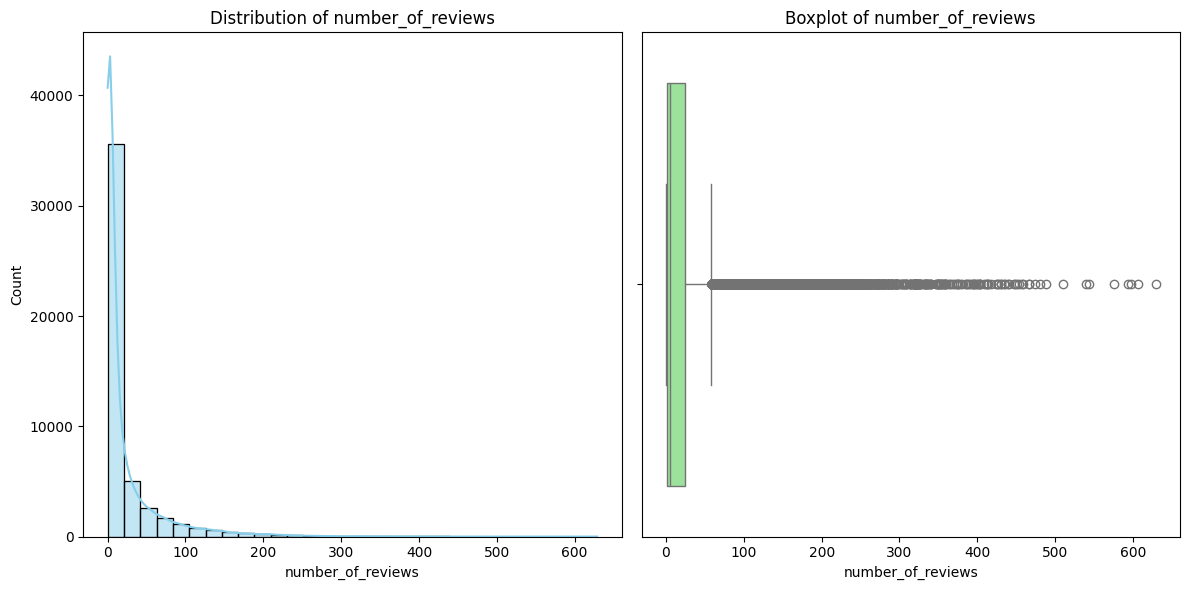

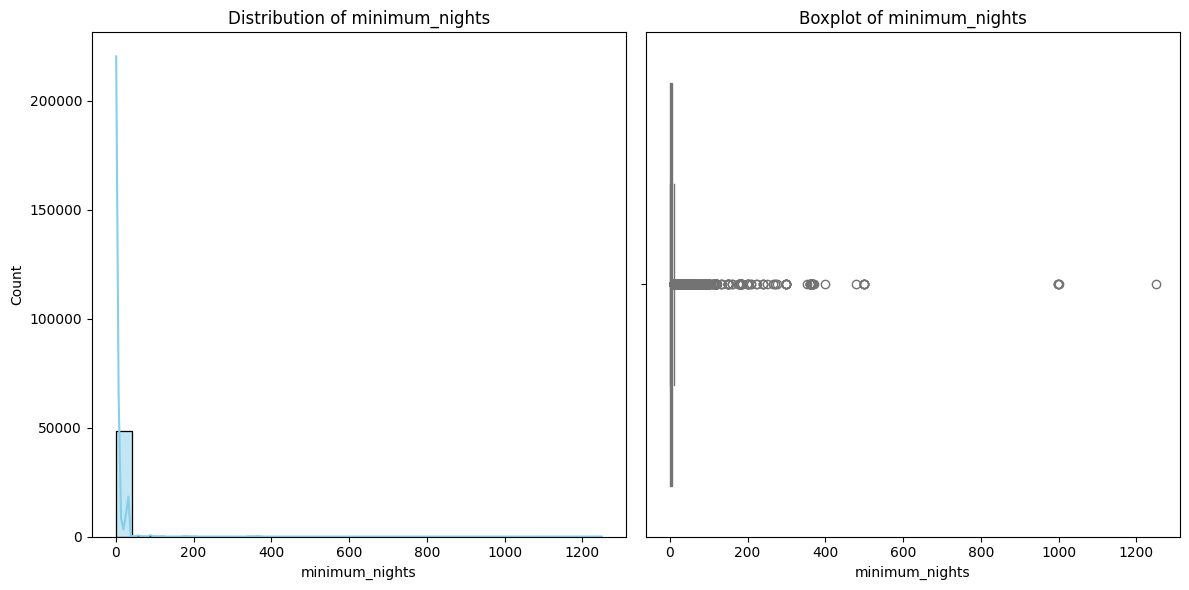

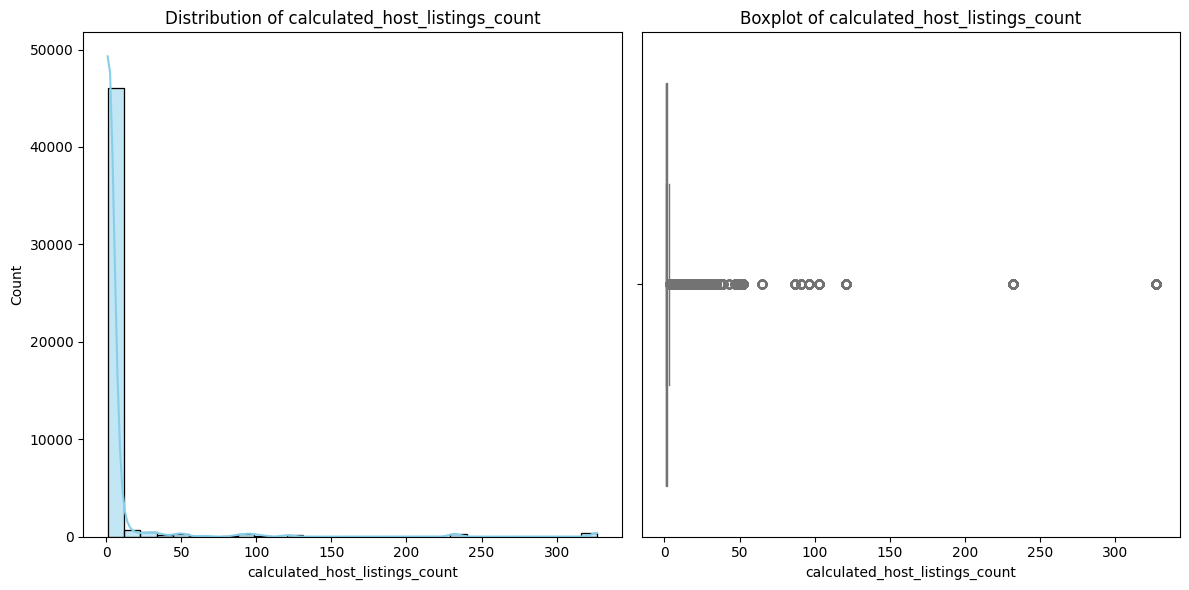

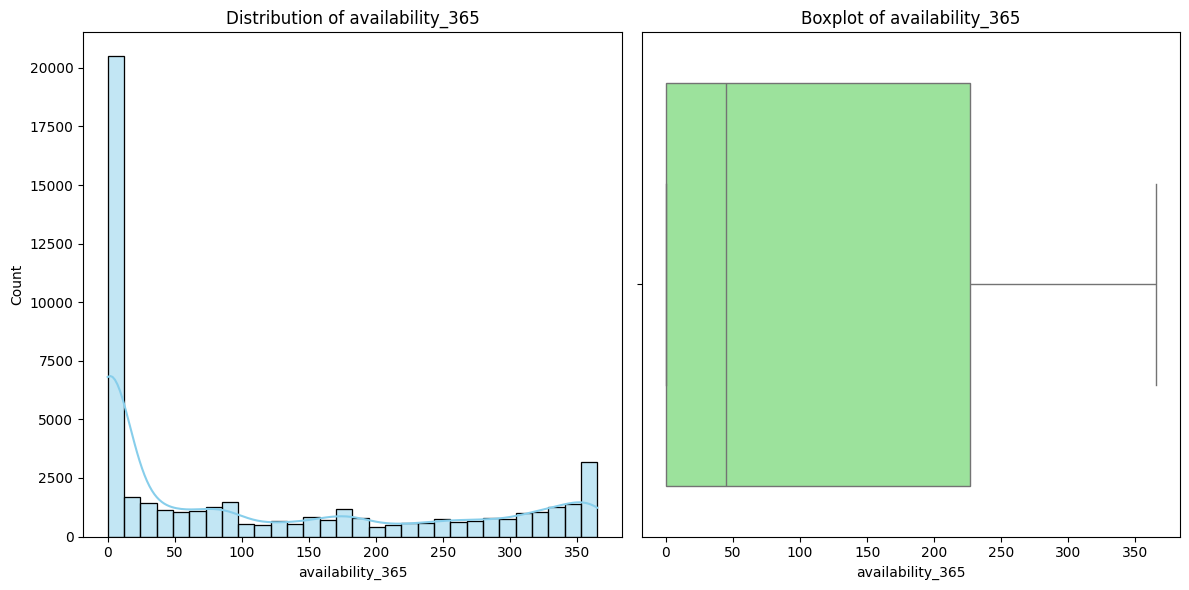

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# List of numerical columns
numerical_features = ['price', 'number_of_reviews', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']

# Calculate Z-scores for each numerical feature
for feature in numerical_features:
    df[f'{feature}_z'] = stats.zscore(df[feature])

# Identify outliers (Z-score threshold of 3)
outliers_dict = {}
for feature in numerical_features:
    outliers_dict[feature] = df[abs(df[f'{feature}_z']) > 3]
    print(f"Number of {feature} outliers: {outliers_dict[feature].shape[0]}")

# Visualizations for each feature
for feature in numerical_features:
    plt.figure(figsize=(12, 6))

    # Histogram for feature distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {feature}')

    # Boxplot for outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')

    plt.tight_layout()
    plt.show()

**DATA PRE-PROCESSING TECHNIQUES**

In [ ]:
# Importing the MinMaxScaler from sklearn to scale features between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying MinMax scaling to the 'price', 'number_of_reviews', and 'minimum_nights' columns
min_max_scale = scaler.fit_transform(df[['price', 'number_of_reviews', 'minimum_nights']])

# Creating a new DataFrame with the scaled values and assigning appropriate column names
df_min_max_scale = pd.DataFrame(min_max_scale, columns=['price', 'number_of_reviews', 'minimum_nights'])

# Displaying the first 3 rows of the scaled DataFrame to check the result
df_min_max_scale.head(3)

,price,number_of_reviews,minimum_nights
0,0.0149,0.014308,0.000000
1,0.0225,0.071542,0.000000
2,0.0150,0.000000,0.001601


In [ ]:
df_min_max_scale.describe()

,price,number_of_reviews,minimum_nights
count,48895.000000,48895.000000,48895.000000
mean,0.015272,0.037002,0.004828
std,0.024015,0.070828,0.016422
min,0.000000,0.000000,0.000000
25%,0.006900,0.001590,0.000000
50%,0.010600,0.007949,0.001601
75%,0.017500,0.038156,0.003203
max,1.000000,1.000000,1.000000


In [ ]:
# Importing the StandardScaler from sklearn to standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Applying Standard scaling to the 'price', 'number_of_reviews', and 'minimum_nights' columns
z_scale = scaler.fit_transform(df[['price', 'number_of_reviews', 'minimum_nights']])

# Creating a new DataFrame with the standardized values and assigning appropriate column names
df_z_scale = pd.DataFrame(z_scale, columns=['price', 'number_of_reviews', 'minimum_nights'])

# Displaying the first 3 rows of the standardized DataFrame to check the result
df_z_scale.head(3)

,price,number_of_reviews,minimum_nights
0,-0.015493,-0.320414,-0.293996
1,0.300974,0.487665,-0.293996
2,-0.011329,-0.522433,-0.196484


In [ ]:
df_z_scale.describe()

,price,number_of_reviews,minimum_nights
count,4.889500e+04,4.889500e+04,4.889500e+04
mean,3.720195e-17,1.860098e-17,1.104433e-17
std,1.000010e+00,1.000010e+00,1.000010e+00
min,-6.359342e-01,-5.224332e-01,-2.939962e-01
25%,-3.486158e-01,-4.999866e-01,-2.939962e-01
50%,-1.945465e-01,-4.102001e-01,-1.964844e-01
75%,9.277183e-02,1.628580e-02,-9.897262e-02
max,4.100441e+01,1.359649e+01,6.060212e+01


In [ ]:
# Defining a function to categorize columns based on their data type and cardinality (unique values)
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # Identifying categorical columns (object type)
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    # Identifying columns that are numeric but have a small number of unique values, considered categorical
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    # Identifying categorical columns with high cardinality (many unique values)
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    # Combining the categorical columns and numeric columns with low unique values
    cat_cols = cat_cols + num_but_cat

    # Removing columns that are both categorical and have high cardinality
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Identifying numeric columns (non-object type)
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    # Removing numeric columns that have been considered as categorical (low cardinality)
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Printing the summary information for the dataset
    print(f"Observations: {dataframe.shape[0]}")  # Number of rows (observations)
    print(f"Variables: {dataframe.shape[1]}")    # Number of columns (variables)
    print(f'cat_cols: {len(cat_cols)}')           # Number of categorical columns
    print(f'num_cols: {len(num_cols)}')           # Number of numeric columns
    print(f'cat_but_car: {len(cat_but_car)}')     # Number of categorical columns with high cardinality
    print(f'num_but_cat: {len(num_but_cat)}')     # Number of numeric columns considered as categorical

    # Returning the categorized column lists
    return cat_cols, num_cols, cat_but_car, num_but_cat

# Calling the function and storing the results for categorical, numeric, and special columns
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 48895
Variables: 22
cat_cols: 2
num_cols: 16
cat_but_car: 4
num_but_cat: 0


**TARGET VARIABLE ANALYSIS**

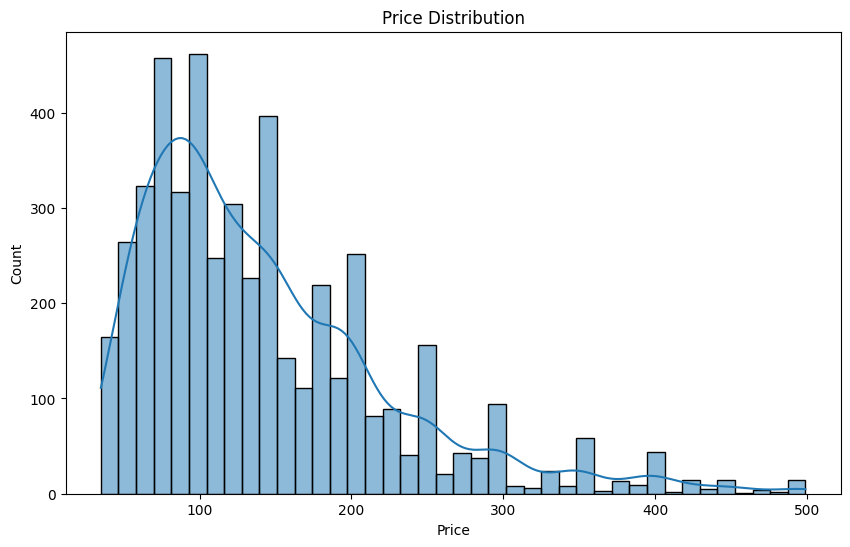

In [ ]:
# Plot distribution of prices
plt.figure(figsize=(10,6))
sns.histplot(df[df['price'] < 500]['price'], kde=True, bins=40)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()

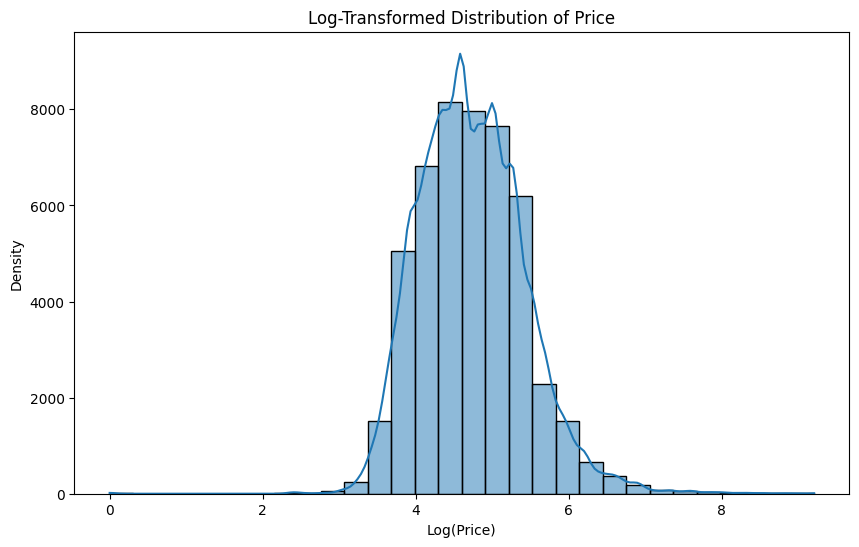

In [ ]:
import numpy as np

# Log-transform price for a more normal distribution
df['log_price'] = np.log(df['price'] + 1)

# Plot the log-transformed price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], kde=True, bins=30)
plt.title('Log-Transformed Distribution of Price')
plt.xlabel('Log(Price)')
plt.ylabel('Density')
plt.show()

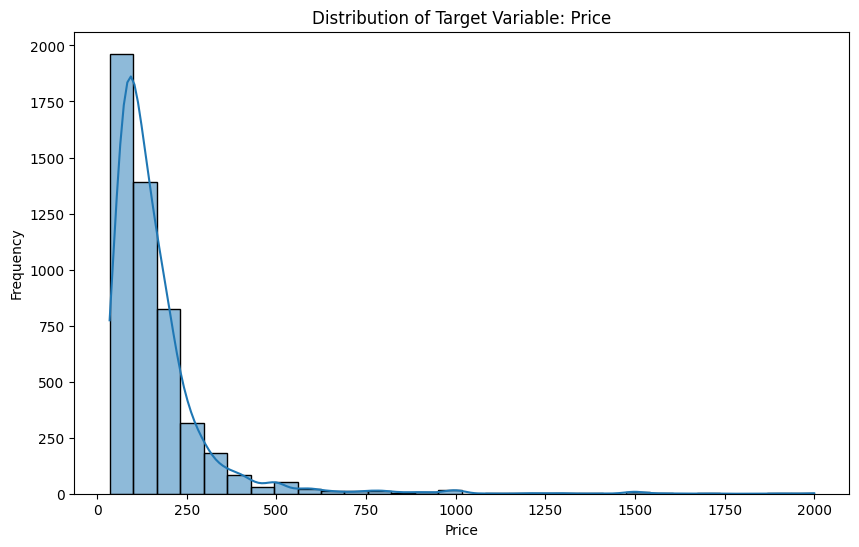

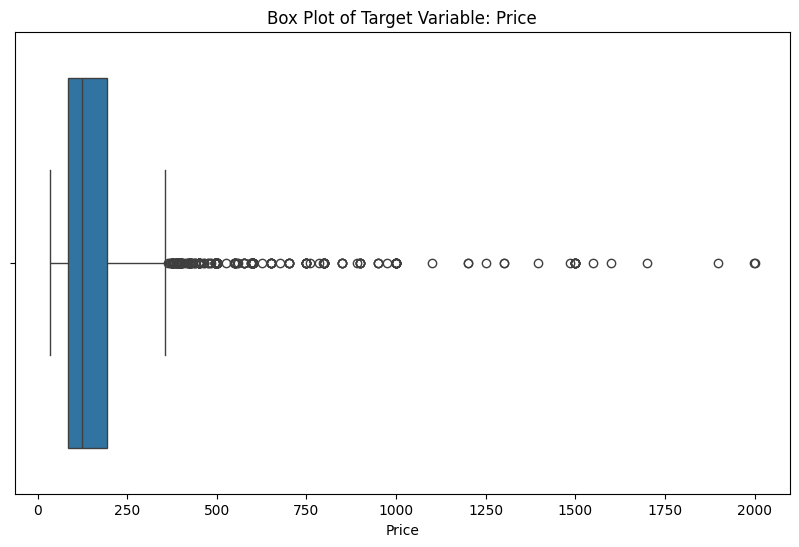

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title("Distribution of Target Variable: Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Box plot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title("Box Plot of Target Variable: Price")
plt.xlabel("Price")
plt.show()

**MACHINE LEARNING MODELS**

Model 1 - Stochastic Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Check for missing values and handle them
df = df.dropna()  # for imputation

# Separate target and features
y = df["price"]
X = df.drop(["price"], axis=1)

# Identify categorical columns and apply one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale the target variable
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

# Initialize the model for incremental learning
model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=17)

# Set the batch size for incremental learning
batch_size = 10000  #we have set batch size based on memory capacity

# Train the model incrementally
for i in range(0, len(X_train_scaled), batch_size):
    X_batch = X_train_scaled[i:i + batch_size]
    y_batch = y_train_scaled[i:i + batch_size]
    model.partial_fit(X_batch, y_batch)

# Predict on the test data
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predicted values to the original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Print other performance metrics like MAE, R^2, etc.
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")

RMSE: 60.033880620566485
MAE: 10.697746916511038
R^2 Score: 0.8476754136723287


In [ ]:
# Convert Series to NumPy arrays
y_test = y_test.to_numpy().flatten()
y_pred = y_pred.flatten()

# Create a DataFrame to print actual and predicted values
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

# Print the first few rows of the comparison DataFrame
print(comparison_df.head())  # Print the first few rows for quick inspection


   Actual Price  Predicted Price
0           120       117.381659
1            81        76.009427
2           110       102.273413
3            77        42.009684
4            95       100.933794


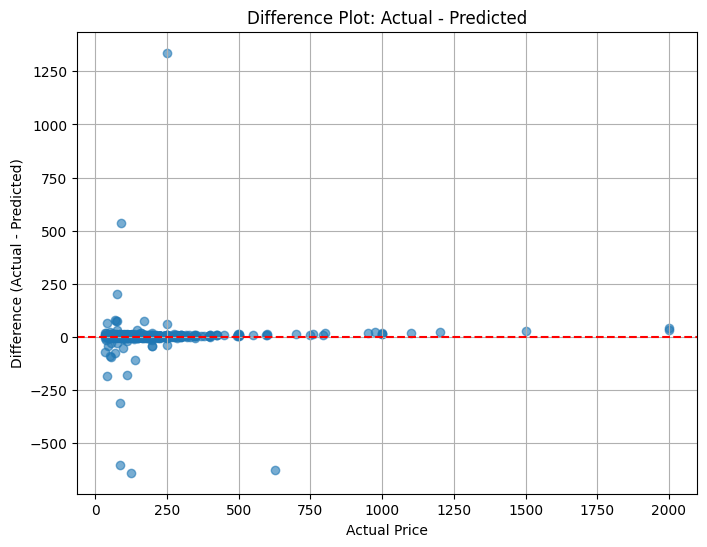

In [ ]:
# Difference Plot (Actual - Predicted)
plt.figure(figsize=(8, 6))

# Ensure the arrays are 1D
differences = y_test - y_pred

# Create the scatter plot
plt.scatter(y_test, differences, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Difference Plot: Actual - Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Difference (Actual - Predicted)')
plt.grid(True)
plt.show()


Model 2- XGBoost

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Check for missing values and handle them
df = df.dropna()  # for imputation

# Separate target and features
y = df["price"]
X = df.drop(["price"], axis=1)

# Identify categorical columns and apply one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale the target variable
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

# Convert the training data into DMatrix format (used by XGBoost)
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_scaled)
dtest = xgb.DMatrix(X_test_scaled, label=y_test_scaled)

# Set the XGBoost parameters (these can be tuned later)
params = {
    'objective': 'reg:squarederror',  # regression task
    'max_depth': 6,                    # depth of trees
    'learning_rate': 0.1,             # step size to improve model
    'n_estimators': 100,              # number of boosting rounds
}

# Set the batch size for incremental learning
batch_size = 10000  # we have set batch size based on memory capacity

# Train the model incrementally (simulated by batching in XGBoost)
for i in range(0, len(X_train_scaled), batch_size):
    X_batch = X_train_scaled[i:i + batch_size]
    y_batch = y_train_scaled[i:i + batch_size]

    # Convert batch data to DMatrix for XGBoost
    dtrain_batch = xgb.DMatrix(X_batch, label=y_batch)

    # Train the model on this batch
    if i == 0:
        model = xgb.train(params, dtrain_batch, num_boost_round=10)
    else:
        model = xgb.train(params, dtrain_batch, num_boost_round=10, xgb_model=model)

# Predict on the test data
y_pred_scaled = model.predict(dtest)

# Inverse transform the predicted values to the original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Print other performance metrics like MAE, R^2, etc.
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:23:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 65.2408132845474
MAE: 29.934604051378038
R^2 Score: 0.8201063275337219


In [ ]:
# Convert Series to NumPy arrays
y_test = y_test.to_numpy().flatten()
y_pred = y_pred.flatten()

# Create a DataFrame to print actual and predicted values
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

# Print the first few rows of the comparison DataFrame
print(comparison_df.head())  # Print the first few rows for quick inspection


   Actual Price  Predicted Price
0           120       135.496262
1            81       109.232674
2           110       129.238495
3            77       107.471497
4            95       119.632942


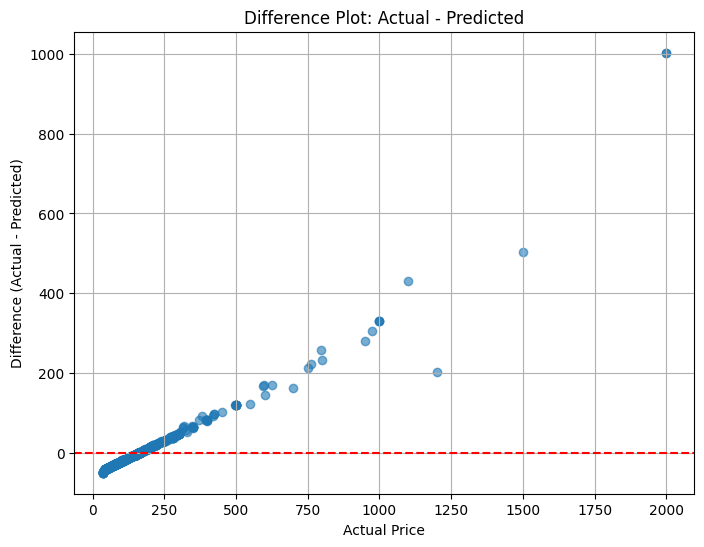

In [ ]:
# Difference Plot (Actual - Predicted)
plt.figure(figsize=(8, 6))

# Ensure the arrays are 1D
differences = y_test - y_pred

# Create the scatter plot
plt.scatter(y_test, differences, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Difference Plot: Actual - Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Difference (Actual - Predicted)')
plt.grid(True)
plt.show()

Model 3 - Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# Initialize the Ridge regression model
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train_scaled, y_train_scaled)

# Predict on the test data
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Inverse transform the predictions
y_pred_ridge = y_scaler.inverse_transform(y_pred_ridge.reshape(-1, 1))

# Evaluate the model
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - RMSE: {rmse_ridge}")
print(f"Ridge Regression - MAE: {mae_ridge}")
print(f"Ridge Regression - R^2 Score: {r2_ridge}")


Ridge Regression - RMSE: 55.88304847876879
Ridge Regression - MAE: 28.332072015873887
Ridge Regression - R^2 Score: 0.8680111176349257


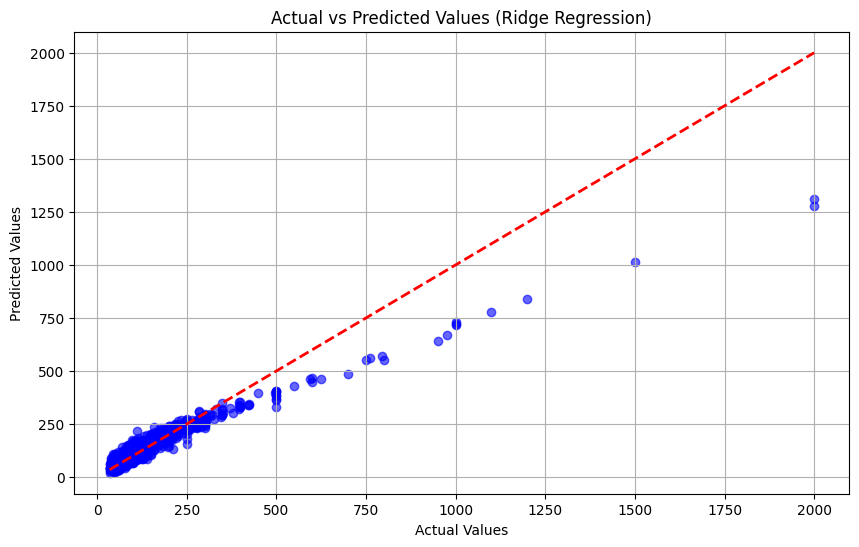

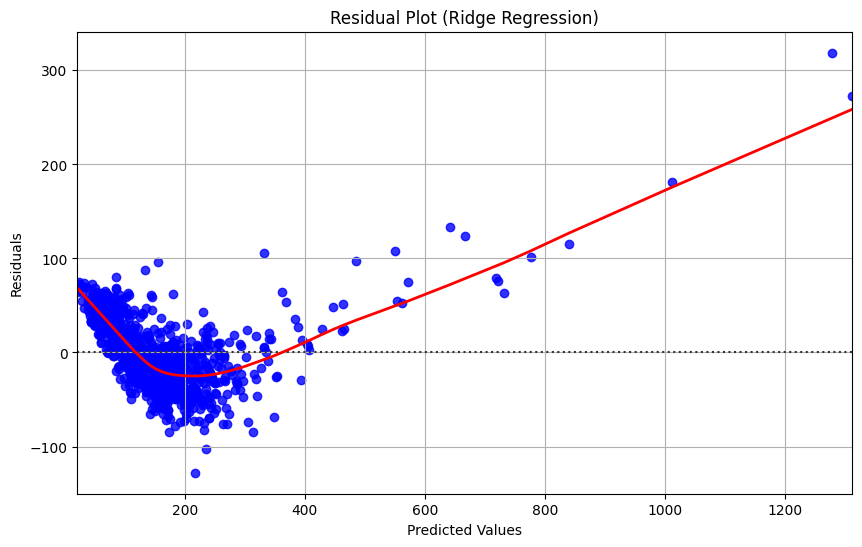

   Actual   Predicted
0     120  154.585694
1      81   86.885650
2     110   87.001514
3      77   44.592838
4      95  130.586676


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure y_pred_ridge is correctly reshaped to match y_test shape
y_pred_ridge = y_pred_ridge.flatten()

# Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test.flatten(), y_pred_ridge, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)  # 45-degree line
plt.title('Actual vs Predicted Values (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Plot Residuals (flatten y_test and y_pred_ridge to ensure 1D input)
residuals = y_test.flatten() - y_pred_ridge
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_ridge, y=residuals, lowess=True, color="blue", line_kws={'color': 'red', 'lw': 2})
plt.title('Residual Plot (Ridge Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Print Actual vs Predicted Values
comparison_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_ridge})
print(comparison_df.head())

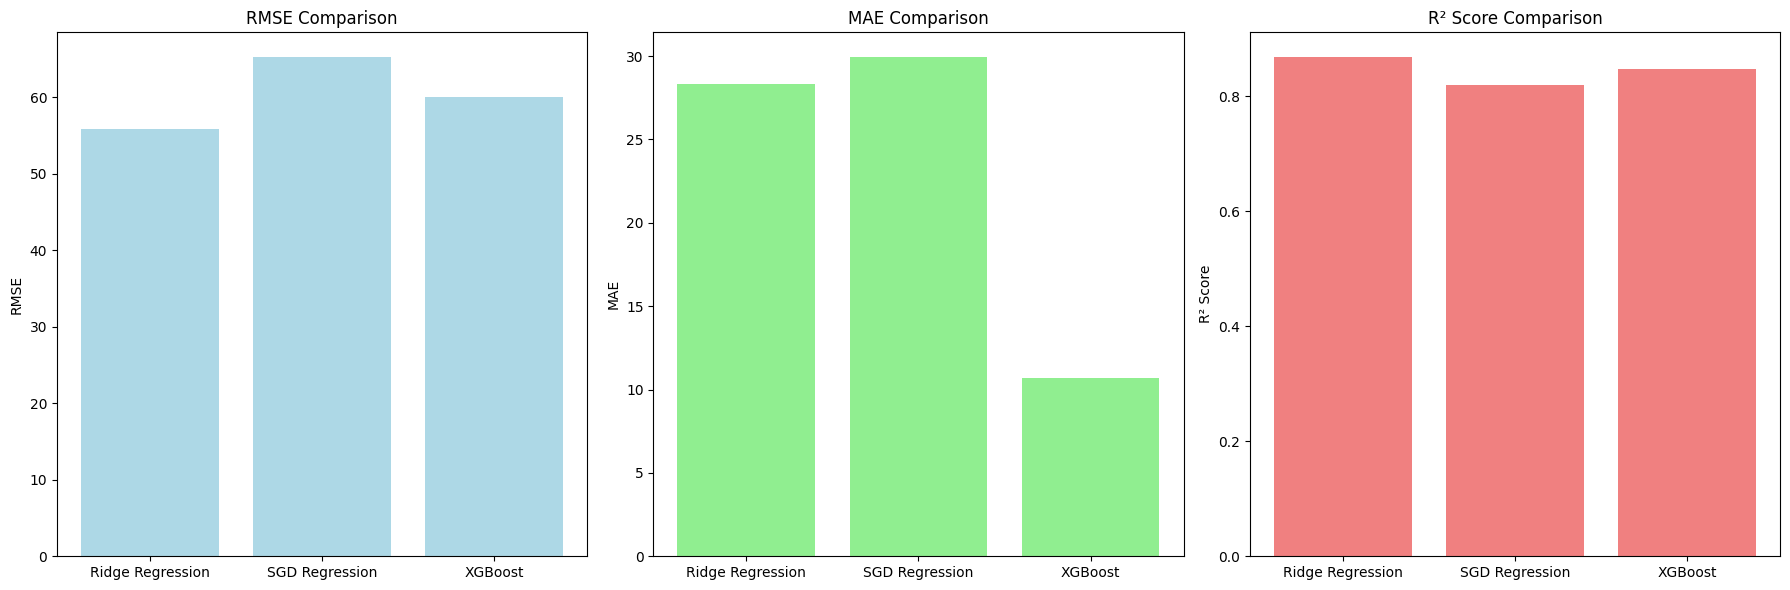

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Ridge Regression', 'SGD Regression', 'XGBoost']

# RMSE values
rmse = [55.88, 65.24, 60.03]
mae = [28.33, 29.93, 10.70]
r2_score = [0.868, 0.820, 0.848]

# Plotting the comparison
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot RMSE
axs[0].bar(models, rmse, color='lightblue')
axs[0].set_title('RMSE Comparison')
axs[0].set_ylabel('RMSE')

# Plot MAE
axs[1].bar(models, mae, color='lightgreen')
axs[1].set_title('MAE Comparison')
axs[1].set_ylabel('MAE')

# Plot R² Score
axs[2].bar(models, r2_score, color='lightcoral')
axs[2].set_title('R² Score Comparison')
axs[2].set_ylabel('R² Score')

plt.tight_layout()
plt.show()